In [7]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Input, Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import np_utils
import tensorflow

Data preparation

In [2]:
x = pd.read_csv('fashion-mnist.csv')
X_ = np.array(x)
X = X_[:, 1:]
y = X[:, 0]
print(X.shape, y.shape)

(10000, 784) (10000,)


In [3]:
np.unique(y, return_counts=True)

(array([0, 1, 2], dtype=int64), array([9997,    2,    1], dtype=int64))

In [4]:
X_train = X.reshape((-1,28,28,1))
Y_train = np_utils.to_categorical(y)

print(X_train.shape,Y_train.shape)

(10000, 28, 28, 1) (10000, 3)


In [5]:
import matplotlib.pyplot as plt

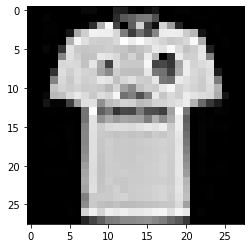

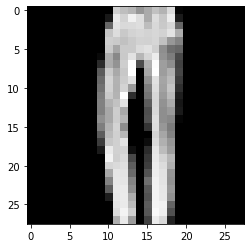

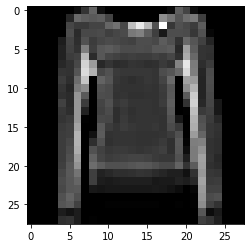

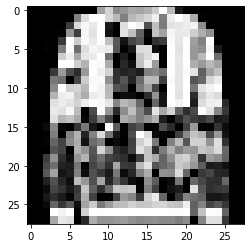

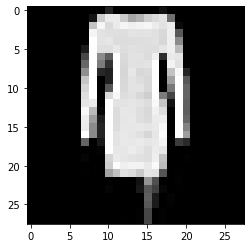

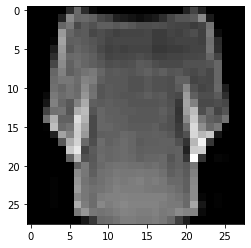

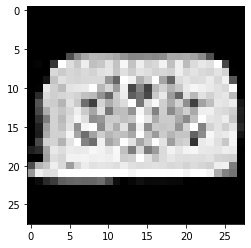

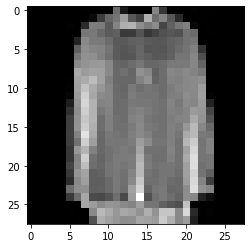

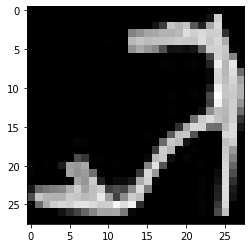

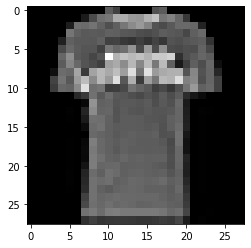

In [6]:
for i in range(10):
    plt.imshow(X_train[i].reshape(28,28),cmap="gray")
    plt.show()

CNN Model

In [11]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2, 2))
model.add(Convolution2D(32, (5, 5), activation='relu'))
model.add(Convolution2D(8, (5, 5), activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 8)           6408      
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)              

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
hist = model.fit(X_train, Y_train, epochs=20, shuffle=True, batch_size=256, validation_split=0.20)

Epoch 1/20
32/32 [==============================] - 31s 564ms/step - loss: 3.3120 - accuracy: 0.7835 - val_loss: 1.7881e-10 - val_accuracy: 1.0000
Epoch 2/20
32/32 [==============================] - 15s 481ms/step - loss: 0.0296 - accuracy: 0.9997 - val_loss: 1.8685e-07 - val_accuracy: 1.0000
Epoch 3/20
32/32 [==============================] - 15s 478ms/step - loss: 0.0157 - accuracy: 0.9998 - val_loss: 4.8836e-05 - val_accuracy: 1.0000
Epoch 4/20
32/32 [==============================] - 15s 473ms/step - loss: 0.0070 - accuracy: 0.9998 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 5/20
32/32 [==============================] - 16s 503ms/step - loss: 0.0060 - accuracy: 0.9998 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 6/20
32/32 [==============================] - 16s 499ms/step - loss: 0.0061 - accuracy: 0.9995 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 7/20
32/32 [==============================] - 16s 485ms/step - loss: 0.0071 - accuracy: 0.9996 - val_loss: 2.7184e-04 - val_

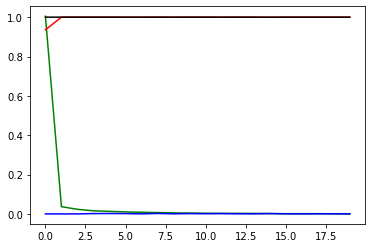

In [17]:
plt.figure(0)
plt.plot(hist.history['loss'], 'g')
plt.plot(hist.history['val_loss'], 'b')

plt.plot(hist.history['accuracy'], 'r')
plt.plot(hist.history['val_accuracy'], 'black')
plt.show()